# 1. 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
from dplython import *
from scipy.stats import linregress
from IPython.display import Image
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize
import matplotlib
import matplotlib.cm as cm
import seaborn as sns
from matplotlib import rcParams
from netCDF4 import Dataset
import struct
import binascii
from mpl_toolkits.basemap import addcyclic
from netCDF4 import num2date, date2num, date2index
import datetime
from pyhdf.SD import SD, SDC
import h5py
import glob
import math

C:\Users\hahw9\Anaconda3\envs\cuda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\hahw9\Anaconda3\envs\cuda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\hahw9\Anaconda3\envs\cuda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\hahw9\Anaconda3\envs\cuda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# 2. 파일 경로 지정해주기

In [2]:
total_GFED4_data = pd.read_csv('/home/seohyunwoo/wild_code/wildfireGFED4.0_total_data.csv')
# 만들었던 csv파일 불러오기
save_file_path = '/home/seohyunwoo/wild_code/wildfire/'
# 파일을 저장할 경로 입력

In [3]:
total_GFED4_data = pd.read_csv('C:/Users/hahw9/For Coding/Model/hdf5/result/GFED4.0_total_data.csv')
save_file_path = 'C:/Users/hahw9/For Coding/Model/hdf5/result/'
# 잠깐 제 환경에 맞게 불러왔습니다.

# 3. 저장할 파일의 이름과 그래프의 제목 만들어주기

In [4]:
month_label_list = []
for year in range(2001,2017):
    for month in range(1,13):
        month_label_list.append(str(year) +" / "+ str(month) +" - Burned Area")


file_name_list = []
for year in range(2001,2017):
    for month in range(1,13):
        file_name_list.append(str(year) +"_"+ str(month) +"_Burned_Area")

'''
위 리스트 두개는 월별 데이터들에 대한 파일 이름과 그래프의 제목이 담긴 리스트를 만드는 코드입니다.
먼저 month_label_list에는 년도 + "/" + 월 + "- Burned Area" 식으로 그래프의 제목을 만들고 만약 2002년 3월 그래프라면 '2003 / 3 - Burned Area'로 이름이 만들어지게 됩니다.

다음 아래의 file_name_list에는 년도 + "_" + 월 + "_Burned_Area" 식으로 파일 이름이 지어지고 위와 마찬가지의 경우라면 2003_3_Burned_Area.png 로 이름이 지어지게됩니다.

- 아래 년도, 계절별, 모두 이와 마찬가지로 제목과 이름이 만들어지게 됩니다.
- 세부적인 것은 수정을 하면 됩니다.

'''
        
        
year_label_list = []
# 월별 관련 이름과 라벨을 만드는 코드와 비슷하며 년도를 바꿀시에는 range(시작년도, 끝나는년도 + 1) 로 변경해주시면됩니다.
for year in range(2001,2017):
    year_label_list.append(str(year) +" - Burned Area(Year)")


year_file_name_list = []
for year in range(2001,2017):
# 월별 관련 이름과 라벨을 만드는 코드와 비슷하며 년도를 바꿀시에는 range(시작년도, 끝나는년도 + 1) 로 변경해주시면됩니다.
    year_file_name_list.append("(Year)"+str(year) + "_Burned Area")



    
temp_season = ["MAM","JJA","SON","DJF"]
'''
만약 2001~2016년까지의 데이터에 대한 계절별 데이터를 뽑을때 2001년의 1월 2월의 데이터는 이전년도의 12월 데이터가 없는 이상 'DJF'를 뽑을수가 없기 때문에
일반적인 시작을 "MAM"으로 설정해 놓았습니다 만약 이전년도 12월데이터를 추가하실 경우에는 시작을 temp_season = ["DJF", "MAM","JJA","SON"] 이런식으로 바꾸시면됩니다.
'''
temp_season_17 = temp_season*17
# 년도에 따라서 temp_season* 뒤에 붙은 숫자를 변경해주시면 됩니다 (예 : 20년치 데이터 -> temp_season*20)
season_label_list = []



year = 2001
# 시작하는 년도를 설정하는 곳입니다
for count in range(1,68):
    # range(1, 뽑을 데이터의 총 계절의 숫자 + 1)
    # 만약 이전년도 12월치 데이터를 추가하시고 코드를 돌릴경우에는 range의 시작은 0으로 하면됩니다 (예 : range(0,68) )
    if count % 4 == 0:
        season_label_list.append(str(year) + "~" + str(year+1) + " / " + temp_season_17[count-1] + " - Burned Area")
        year += 1
    else:
        season_label_list.append(str(year) + " / " + temp_season_17[count-1] + " - Burned Area")

year = 2001
# 위에서 년도 레이블을 만들때와 똑같이 진행되며 필요한 부분은 위와 같이 수정해주시면 됩니다.
season_file_name_list = []
for count in range(1,68):
    if count % 4 == 0:
        season_file_name_list.append("(Season)"+str(year) + "_" + str(year+1) + "_" + temp_season_17[count-1])
        year += 1
    else:
        season_file_name_list.append("(Season)"+str(year) + "_" + temp_season_17[count-1])
    
    

    
'''
만약 시작하는 년도 이전년도의 12월데이터를 추가시켜 DJF부터 만들게 되면 아래 코드를 다음과 같이 전부 바꿔주시면됩니다.

temp_season = ["DJF","MAM","JJA","SON"]
# 위와 마찬가지로 시작하는년도의 1,2월데이터와 마지막년도 12월데이터를 제거하는 경우 이런식으로 사용하게됩니다.
total_season_label_list = []

# 총계절은 4개이기때문에 아래와 같이 4개의 파일이름과 라벨을 만들고 리스트에 추가시켰습니다.
for count in range(4):
    total_season_label_list.append("Total " + temp_season[count] + " - Burned Area(Sum)")


total_season_file_name_list = []
for count in range(4):
    total_season_file_name_list.append("Total"+"_" + temp_season[count]+"_BurnedArea")
    
    
    
def makes_seasonal_list(data_type):
    season_data_list = []
    for x in data_type:
        season_data_list += [i for i in range(x+3,x+6)]
    return season_data_list

DJF = [i for i in range(0,192,12)]
MAM = [i for i in range(3,192,12)]
JJA = [i for i in range(6,192,12)]
SON = [i for i in range(9,192,12)]

DJF_list = makes_seasonal_list(DJF)
MAM_list = makes_seasonal_list(MAM)
JJA_list = makes_seasonal_list(JJA)
SON_list = makes_seasonal_list(SON)
total_seasonal_list = [DJF_list, MAM_list, JJA_list, SON_list]

'''

temp_season = ["MAM","JJA","SON","DJF"]
# 위와 마찬가지로 시작하는년도의 1,2월데이터와 마지막년도 12월데이터를 제거하는 경우 이런식으로 사용하게됩니다.
total_season_label_list = []

# 총계절은 4개이기때문에 아래와 같이 4개의 파일이름과 라벨을 만들고 리스트에 추가시켰습니다.
for count in range(4):
    total_season_label_list.append("Total " + temp_season[count] + " - Burned Area(Sum)")


total_season_file_name_list = []
for count in range(4):
    total_season_file_name_list.append("Total"+"_" + temp_season[count]+"_BurnedArea")
    
    
    
def makes_seasonal_list(data_type):
    season_data_list = []
    for x in data_type:
        season_data_list += [i for i in range(x+5,x+8)]
    return season_data_list


MAM = [i for i in range(0,192,12)]
JJA = [i for i in range(3,192,12)]
SON = [i for i in range(6,192,12)]
DJF = [i for i in range(9,189,12)]

MAM_list = makes_seasonal_list(MAM)
JJA_list = makes_seasonal_list(JJA)
SON_list = makes_seasonal_list(SON)
DJF_list = makes_seasonal_list(DJF)
total_seasonal_list = [MAM_list, JJA_list, SON_list, DJF_list]
# 위와같이 만들어진 리스트는 계절에 해당하는 데이터프레임의 컬럼 번호로 각각의 계절에 해당하는 모든 컬럼들의 인덱스가 해당 리스트에 각각 만들어져 추가 되게 됩니다.

# 4. 그림을 그려주는 코드 만들기

In [5]:
# 월별 평균을 뽑는 코드
def draw_plot(result_data, title, label, save_file_name,num):
    # 이 함수는 월별 평균을 그려주는 함수로, result_data = 사용할 데이터, title = 그래프의 제목, label = 그래프 아래 쓰일 컬러바 또는 그림에 대한 정보
    # save_file_name -> 저장할 파일의 이름, num -> 사용할 데이터에서 쓰일 월 데이터
    
    result_data = result_data[result_data[str(num-3)] != 0]
    # 데이터의 값이 0인것은 모두 제거합니다(컬러바가 0일때 색깔이 있으면 해당 색으로 모두 칠해지게됨)
    
    target_data = np.log10(result_data[str(num-3)]/30)
    # 더 잘보기 위해서 데이터를 log로 변환하며 한달(30일)로 나누어줍니다.
    plt.figure(figsize = (23, 8))
    # 그래프의 크기를 조정합니다.
    
    plt.rc("font", size = 15)
    plt.rcParams['font.family'] = 'Times New Roman'
    # 폰트를 변경할 수 있습니다.
    
    m = Basemap(projection='cyl', lon_0 = 0, lat_0 = 40,
    llcrnrlon = 0, llcrnrlat = 40,
    urcrnrlon = 180, urcrnrlat = 80,
    resolution = 'c')
    # basemap의 세부조정이 가능합니다
    
    X, Y = m(result_data.lon.values, result_data.lat.values)
    # basemap에서 기준이 될 X,Y데이터를 입력합니다(위도와 경도)
    VAL = target_data.values
    # 결과를 보길 원하는 데이터를 입력합니다.
    
    
    m.scatter(X, Y, c = VAL, s = 1.0, marker = "s", zorder = 1, vmin = 0, vmax = 5, cmap = plt.cm.get_cmap('jet'), alpha = 1.0)
    # vmin과 vmax를 조정함으로써 컬러바의 최대 최소값을 조정할 수 있습니다.
    
    m.colorbar(location='bottom', label = label, pad = 0.5)
    # 컬러바의 위치를 어디로 할건지 정해줍니다.(여기서는 아래로 지정)
    
    m.drawcoastlines(color = 'black')
    # 해안선
    m.drawcountries(color = 'black')
    # 국경선
    m.drawmapboundary(fill_color = 'white')
    # 그림의 배경색
    
    m.drawparallels(np.arange(-150,30,10), labels=[1,0,0,0])
    m.drawmeridians(np.arange(-180,0,30), labels=[0,0,0,1])
    # 위도, 경도의 가이드라인에 대해 조절 할 수 있습니다.
    # np.arange(시작점, 끝점, 간격)
    plt.title(title + "\n")
    # 그림의 제목
    plt.savefig(save_file_path + save_file_name , dpi=300)
    # 그림을 저장하며 dpi를 조정해 해상도를 조절 할 수 있습니다.

# 연간 평균을 뽑는 코드
def draw_plot_yearly(result_data, title, label, save_file_name, x):
    lon_lat_df = total_GFED4_data.iloc[:,[1,2]]
    #위도 경도 데이터를 미리 다른 데이터 프레임에 저장시켜놓습니다
    year_data_list = [i for i in range(12*x+3,12*x+15)]
    # 12개의 데이터를 합쳐야 하므로 위와같은 코드를 사용하여 1년간격을 조정하였습니다
    
    count_year = year_data_list
    df = total_GFED4_data.iloc[:,count_year]
    # count_year라는 리스트에 [1,2,3,4,5,6,7,8,9,10,11,12] 이런식으로 입력이 되어있는데 원본데이터에서 '1'~'12'의 이름에 해당하는 데이터를 따로 뽑아서 df에 저장합니다
    new_df = df.sum(axis=1)
    # 위에서 따로 뽑은 데이터를 행을 기준으로 합치게 됩니다
    new_df = new_df/365
    # 합친 데이터를 1년 즉 365일로 나누어 주게 됩니다.
    lon_lat_df['0'] = new_df
    # 위에서 만든 위도 경도 데이터 프레임에 새로 만든 new_df(위에서 만든 데이터)를 추가 시켜줍니다.
    result_data = lon_lat_df
    result_data = result_data[result_data[str(0)] != 0]
    # 출력할 데이터가 0인것은 위에서와 마찬가지로 컬러바 0에 해당하는 색이 칠해질수 있으므로 모두 제거해줍니다.
    target_data = np.log10(result_data[str(0)])
    # 출력할 데이터를 log로 변환해줍니다.
    # 아래는 위와 마찬가지입니다.

    plt.figure(figsize = (23, 8))
    #plt.style.use('seaborn-darkgrid')
    plt.rc("font", size = 15)
    plt.rcParams['font.family'] = 'Times New Roman'
    m = Basemap(projection='cyl', lon_0 = 0, lat_0 = 40,
    llcrnrlon = 0, llcrnrlat = 40,
    urcrnrlon = 180, urcrnrlat = 80,
    resolution = 'c')
    X, Y = m(result_data.lon.values, result_data.lat.values)

    VAL = target_data.values
    # cmap_color = 'Purples'
    m.scatter(X, Y, c = VAL, s = 1.0, marker = "s", zorder = 1, vmin = 0, vmax = 5, cmap = plt.cm.get_cmap('jet'), alpha = 1.0)
    m.colorbar(location='bottom', label = label, pad = 0.5)
    m.drawcoastlines(color = 'black')
    m.drawcountries(color = 'black')
    m.drawmapboundary(fill_color = 'white')
    m.drawparallels(np.arange(-150,120,10), labels=[1,0,0,0])
    m.drawmeridians(np.arange(-180,180,30), labels=[0,0,0,1])
    plt.title(title + "\n")
    fig = plt.gcf()
    plt.savefig(save_file_path + save_file_name , dpi=300)


# 계절별 데이터를 뽑는 코드
def draw_plot_seasonly(result_data, title, label, save_file_name, x):
    lon_lat_df = total_GFED4_data.iloc[:,[1,2]]
    season_data_list = [i for i in range(3*x+5,3*x+8)]
    # 계절별 데이터를 뽑기 위해 위와 같이 코드를 조정했고 나머지 부분은 위의 설명과 거의 비슷하게 해석하시면 됩니다.
    
    count_season = season_data_list
    df = total_GFED4_data.iloc[:,count_season]
    new_df = df.sum(axis=1)
    new_df = new_df/90

    lon_lat_df['0'] = new_df
    result_data = lon_lat_df
    result_data = result_data[result_data[str(0)] != 0]
    target_data = np.log10(result_data[str(0)])

    plt.figure(figsize = (23, 8))
    #plt.style.use('seaborn-darkgrid')
    plt.rc("font", size = 15)
    plt.rcParams['font.family'] = 'Times New Roman'
    m = Basemap(projection='cyl', lon_0 = 0, lat_0 = 40,
    llcrnrlon = 0, llcrnrlat = 40,
    urcrnrlon = 180, urcrnrlat = 80,
    resolution = 'c')
    X, Y = m(result_data.lon.values, result_data.lat.values)

    VAL = target_data.values
    # cmap_color = 'Purples'
    m.scatter(X, Y, c = VAL, s = 1.0, marker = "s", zorder = 1, vmin = 0, vmax = 5, cmap = plt.cm.get_cmap('jet'), alpha = 1.0)
    m.colorbar(location='bottom', label = label, pad = 0.5)
    m.drawcoastlines(color = 'black')
    m.drawcountries(color = 'black')
    m.drawmapboundary(fill_color = 'white')
    m.drawparallels(np.arange(-150,120,10), labels=[1,0,0,0])
    m.drawmeridians(np.arange(-180,180,30), labels=[0,0,0,1])
    plt.title(title + "\n")
    fig = plt.gcf()
    plt.savefig(save_file_path + save_file_name , dpi=300)
    
    
    



# 계절 총 평균 코드
def draw_plot_total_seasonly(result_data, season_list,title, label, save_file_name,x):
    lon_lat_df = total_GFED4_data.iloc[:,[1,2]]
    df = total_GFED4_data.iloc[:,season_list]
    new_df = df.sum(axis=1)
    
    if x == 3:
        new_df = new_df*1.06666666666
    else:
        new_df = new_df

        
    lon_lat_df['0'] = new_df
    result_data = lon_lat_df
    result_data = result_data[result_data[str(0)] != 0]
    target_data = np.log10(result_data[str(0)])

    plt.figure(figsize = (23, 8))
    #plt.style.use('seaborn-darkgrid')
    plt.rc("font", size = 15)
    plt.rcParams['font.family'] = 'Times New Roman'
    m = Basemap(projection='cyl', lon_0 = 0, lat_0 = 40,
    llcrnrlon = 0, llcrnrlat = 40,
    urcrnrlon = 180, urcrnrlat = 80,
    resolution = 'c')
    X, Y = m(result_data.lon.values, result_data.lat.values)

    VAL = target_data.values
    # cmap_color = 'Purples'
    m.scatter(X, Y, c = VAL, s = 1.0, marker = "s", zorder = 1, vmin = 0, vmax = 8, cmap = plt.cm.get_cmap('jet'), alpha = 1.0)
    m.colorbar(location='bottom', label = label, pad = 0.5)
    m.drawcoastlines(color = 'black')
    m.drawcountries(color = 'black')
    m.drawmapboundary(fill_color = 'white')
    m.drawparallels(np.arange(-150,120,10), labels=[1,0,0,0])
    m.drawmeridians(np.arange(-180,180,30), labels=[0,0,0,1])
    plt.title(title + "\n")
    fig = plt.gcf()
    plt.savefig(save_file_path + save_file_name , dpi=300)
    

# 모든 데이터 코드(전체 평균)
def draw_plot_total(result_data, title, label, save_file_name):
    lon_lat_df = total_GFED4_data.iloc[:,[1,2]]
    year_data_list = [i for i in range(3,total_GFED4_data.shape[1])]
    count_year = year_data_list
    df = total_GFED4_data.iloc[:,count_year]
    new_df = df.sum(axis=1)
    new_df_array = np.array(new_df)
    print(new_df_array.max())
    new_df = new_df/total_GFED4_data.shape[1]
    lon_lat_df['0'] = new_df
    result_data = lon_lat_df
    print(result_data.head())
    result_data = result_data[result_data[str(0)] != 0]
    target_data = np.log(result_data[str(0)])

    plt.figure(figsize = (23, 8))
    #plt.style.use('seaborn-darkgrid')
    plt.rc("font", size = 15)
    plt.rcParams['font.family'] = 'Times New Roman'
    m = Basemap(projection='cyl', lon_0 = 0, lat_0 = 40,
    llcrnrlon = 0, llcrnrlat = 40,
    urcrnrlon = 180, urcrnrlat = 80,
    resolution = 'c')
    X, Y = m(result_data.lon.values, result_data.lat.values)

    VAL = target_data.values
    # cmap_color = 'Purples'
    m.scatter(X, Y, c = VAL, s = 1.0, marker = "s", zorder = 1, vmin = 0, vmax = 11, cmap = plt.cm.get_cmap('jet'), alpha = 1.0)
    m.colorbar(location='bottom', label = label, pad = 0.5)
    m.drawcoastlines(color = 'black')
    m.drawcountries(color = 'black')
    m.drawmapboundary(fill_color = 'white')
    m.drawparallels(np.arange(-150,90,10), labels=[1,0,0,0])
    m.drawmeridians(np.arange(-180,180,30), labels=[0,0,0,1])
    plt.title(title + "\n")
    plt.savefig(save_file_path + save_file_name , dpi=300)

# 5. 그림을 그려주는 코드를 사용하여 한번에 그림 그려주는 함수 만들기
- 월평 평균 코드 : 2001~2016년까지의 모든 달을 그려줌
- 연간 평균 코드 : 2001~2016년까지의 모든 년도를 그려줌
- 계절별,계절별 총평균, 모든 평균 : 2001~2016년까지의 모든 계절, 계절별, 총평균, 모든평균들을 그려줌

In [6]:
def extract_monthly():
    for num in range(3,195):
        # 월별 데이터는 192개이며 3번째 컬럼부터 194번째 컬럼을 뽑아주면 된다.
        draw_plot(total_GFED4_data.iloc[:,[1,2,num]], month_label_list[num-3], "Average of BA(log scale)" ,file_name_list[num-3], num)


def extract_yearly():
    for x in range(16):
        # 16개의 연평균 그림을 그려줌
        draw_plot_yearly(total_GFED4_data, year_label_list[x], "Average of BA(log scale)" ,year_file_name_list[x], x)

def extract_seasonly():
    # 63개의 총 계절 그림을 그려줌
    # 원래 192/3 -> 64이지만 시작년도인 2001년도의 1월,2월 그리고 마지막 년도인 2016년도의 12월 데이터는 간격상 빠지게 되므로 63개
    for x in range(63):
        draw_plot_seasonly(total_GFED4_data, season_label_list[x], "Average of BA(log scale)" ,season_file_name_list[x], x)
    
def extract_total_seasonly():
    # 계절별 총 평균을 그려줌
    for x in range(4):
        draw_plot_total_seasonly(total_GFED4_data, total_seasonal_list[x],total_season_label_list[x], "Sum of BA(log scale)" ,total_season_file_name_list[x], x)

# 6. 그림 그리기(만들어준 함수를 실행)

23339519
       lon     lat    0
0 -179.875  89.875  0.0
1 -179.625  89.875  0.0
2 -179.375  89.875  0.0
3 -179.125  89.875  0.0
4 -178.875  89.875  0.0


C:\Users\hahw9\Anaconda3\envs\cuda\lib\site-packages\ipykernel_launcher.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


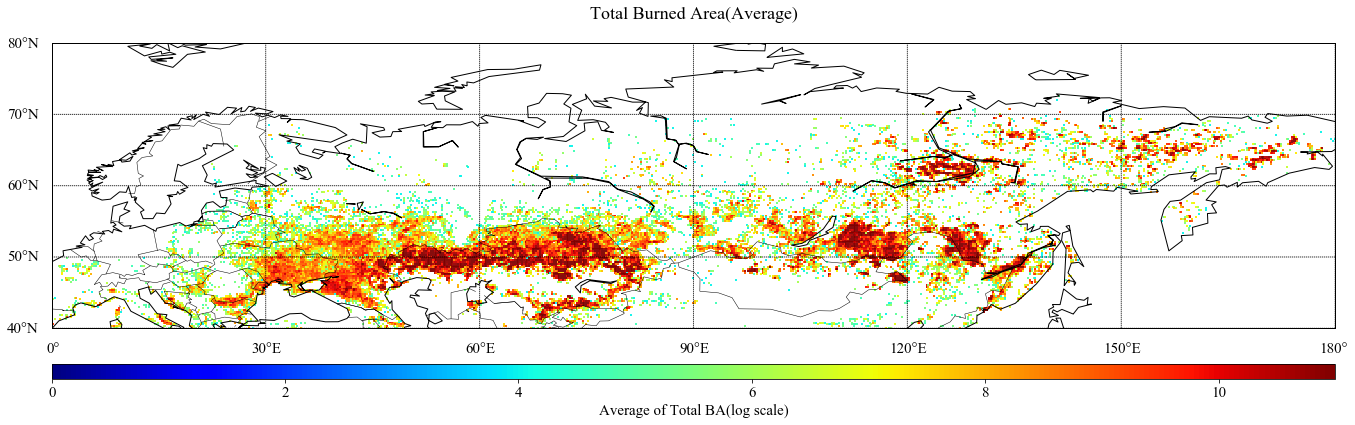

In [7]:
#extract_monthly()

#extract_yearly()

#extract_seasonly()

#extract_total_seasonly()

draw_plot_total(total_GFED4_data, 'Total Burned Area(Average)',"Average of Total BA(log scale)",'Total_Average_BA')
# 모든 데이터를 합쳐서 평균해준 그림을 그리는 코드는 어차피 하나만 그리면되서 다른것처럼 그려야하는 갯수대로 그리는 함수를 만들지는 않았습니다.